In [1]:
#acs-trigger-rate

In [2]:
import re
import time
import requests

import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

%matplotlib inline


In [26]:
log_lines = []

for l in open("ibas_acsmonitor_log.txt"):
    if re.match(".*? +2021-0[12]-.*?", l) or re.match(".*? +2020-1.*?", l):
        log_lines.append(l)
        
        
recent_log = "\n".join(log_lines)
        

In [27]:
events=[]

for l in recent_log.split("\n"):
    for n, rex in [
        (
            '0 - pre-detection',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: The best burst is:  OBT=(?P<obt>.*?)  s=(?P<sigma>.*?)  bgrd=(?P<background>[0-9\.]*)'
        ),
        (
            '1 - background-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]+?) is out of range <5400.0 : 7500.0>'
        ),
        (
            '2 - background-in-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: burst background level (?P<background>[0-9\.]*?) is in acceptable range <(?P<backgroundl1>[0-9\.]*?) : (?P<backgroundl2>[0-9\.]*?)>'
        ),
        (
            '3 - sc-distance-out-of-range',
            '^.*? +(?P<date>20.*?) .*?Main_Vfy: S/C distance (?P<scdistance>[0-9\.]*?) is out of range <(?P<scdistancel1>[0-9\.]*?) : (?P<scdistancel2>[0-9\.]*?)>'
        ),
        (
            '9 - distributed-detection',
            '^.*? +(?P<date>20.*?) .*?LC/EPH: OBT=(.*?) past=(.*?) future=(.*?) delay=(.*?) fname=.*?'
        )
    ]:
        r = re.search(rex, l)
        if r:
            R = r.groupdict()
            print(n, R)
            events.append(
                {**R,
                **dict(
                    event=n,
                    date=R['date'],
                    time_s=time.mktime(time.strptime(R['date'], "%Y-%m-%dT%H:%M:%S"))
                )}
            )

0 - pre-detection {'date': '2020-10-01T12:07:08', 'obt': '35688021.293', 'sigma': '6.207', 'background': '6613.2'}
2 - background-in-range {'date': '2020-10-01T12:07:08', 'background': '6613.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-10-01T12:07:08', 'scdistance': '93261.9', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-10-01T12:50:05', 'obt': '35690599.443', 'sigma': '9.053', 'background': '6632.9'}
2 - background-in-range {'date': '2020-10-01T12:50:05', 'background': '6632.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-10-01T12:50:05', 'scdistance': '88717.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-10-02T00:53:16', 'obt': '35734018.693', 'sigma': '6.960', 'background': '7674.7'}
1 - background-out-of-range {'date': '2020-10-02T00:53:16', 'background': '7674.7'}
0 - pre-detection {'date': 

0 - pre-detection {'date': '2020-10-08T05:34:37', 'obt': '36269322.993', 'sigma': '6.217', 'background': '6814.0'}
2 - background-in-range {'date': '2020-10-08T05:34:37', 'background': '6814.0', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-10-08T05:34:37'}
0 - pre-detection {'date': '2020-10-09T03:09:25', 'obt': '36346959.793', 'sigma': '9.295', 'background': '6745.2'}
2 - background-in-range {'date': '2020-10-09T03:09:25', 'background': '6745.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-10-09T03:09:25'}
0 - pre-detection {'date': '2020-10-09T03:09:25', 'obt': '36346964.693', 'sigma': '10.106', 'background': '6751.8'}
2 - background-in-range {'date': '2020-10-09T03:09:25', 'background': '6751.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-10-09T03:09:25'}
0 - pre-detection {'date': '2020-10-11T12:52:14', 'obt': '36554774.593', 'sigma': '6

0 - pre-detection {'date': '2020-10-25T13:42:13', 'obt': '37767335.343', 'sigma': '9.072', 'background': '6749.7'}
2 - background-in-range {'date': '2020-10-25T13:42:13', 'background': '6749.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-10-25T13:42:13', 'scdistance': '72128.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-10-25T13:42:54', 'obt': '37767363.143', 'sigma': '25.215', 'background': '6634.4'}
2 - background-in-range {'date': '2020-10-25T13:42:54', 'background': '6634.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-10-25T13:42:54', 'scdistance': '72066.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-10-25T13:49:02', 'obt': '37767751.643', 'sigma': '6.295', 'background': '6781.7'}
2 - background-in-range {'date': '2020-10-25T13:49:02', 'background': '6781.7', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2020-10-25T23:59:42', 'obt': '37804383.143', 'sigma': '9.182', 'background': '7710.2'}
1 - background-out-of-range {'date': '2020-10-25T23:59:42', 'background': '7710.2'}
0 - pre-detection {'date': '2020-10-26T00:00:06', 'obt': '37804400.243', 'sigma': '21.107', 'background': '7647.2'}
1 - background-out-of-range {'date': '2020-10-26T00:00:06', 'background': '7647.2'}
0 - pre-detection {'date': '2020-10-26T00:02:46', 'obt': '37804553.793', 'sigma': '18.015', 'background': '7913.9'}
1 - background-out-of-range {'date': '2020-10-26T00:02:46', 'background': '7913.9'}
0 - pre-detection {'date': '2020-10-26T00:10:14', 'obt': '37805004.193', 'sigma': '9.029', 'background': '7618.0'}
1 - background-out-of-range {'date': '2020-10-26T00:10:14', 'background': '7618.0'}
0 - pre-detection {'date': '2020-10-26T00:16:38', 'obt': '37805417.343', 'sigma': '10.900', 'background': '7487.6'}
2 - background-in-range {'date': '2020-10-26T00:16:38', 'background': '7487.6', 'backg

0 - pre-detection {'date': '2020-10-28T05:36:30', 'obt': '37997390.943', 'sigma': '22.626', 'background': '9649.5'}
1 - background-out-of-range {'date': '2020-10-28T05:36:30', 'background': '9649.5'}
0 - pre-detection {'date': '2020-10-28T05:41:10', 'obt': '37997667.643', 'sigma': '9.027', 'background': '9693.5'}
1 - background-out-of-range {'date': '2020-10-28T05:41:10', 'background': '9693.5'}
0 - pre-detection {'date': '2020-10-28T05:42:54', 'obt': '37997774.393', 'sigma': '29.963', 'background': '10283.5'}
1 - background-out-of-range {'date': '2020-10-28T05:42:54', 'background': '10283.5'}
0 - pre-detection {'date': '2020-10-28T05:43:34', 'obt': '37997804.993', 'sigma': '145.476', 'background': '10135.3'}
1 - background-out-of-range {'date': '2020-10-28T05:43:34', 'background': '10135.3'}
0 - pre-detection {'date': '2020-10-28T05:46:46', 'obt': '37998011.443', 'sigma': '22.396', 'background': '10196.3'}
1 - background-out-of-range {'date': '2020-10-28T05:46:46', 'background': '1019

2 - background-in-range {'date': '2020-10-31T08:43:42', 'background': '7303.8', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-10-31T08:43:42', 'scdistance': '72407.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-10-31T17:50:15', 'obt': '38300655.543', 'sigma': '10.902', 'background': '6955.2'}
2 - background-in-range {'date': '2020-10-31T17:50:15', 'background': '6955.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-10-31T17:50:15'}
0 - pre-detection {'date': '2020-11-02T11:48:23', 'obt': '38451745.293', 'sigma': '10.546', 'background': '6782.2'}
2 - background-in-range {'date': '2020-11-02T11:48:23', 'background': '6782.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-11-02T11:48:23', 'scdistance': '83277.9', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-1

0 - pre-detection {'date': '2020-11-11T03:46:55', 'obt': '39200458.193', 'sigma': '8.316', 'background': '7181.1'}
2 - background-in-range {'date': '2020-11-11T03:46:55', 'background': '7181.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-11-11T03:46:55', 'scdistance': '97398.4', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-11-11T07:46:16', 'obt': '39214817.493', 'sigma': '10.519', 'background': '7072.4'}
2 - background-in-range {'date': '2020-11-11T07:46:16', 'background': '7072.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-11-11T07:46:16'}
0 - pre-detection {'date': '2020-11-11T12:53:11', 'obt': '39233234.643', 'sigma': '9.020', 'background': '6965.6'}
2 - background-in-range {'date': '2020-11-11T12:53:11', 'background': '6965.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-11-11T12:53:11'}
0 

0 - pre-detection {'date': '2020-11-21T04:38:23', 'obt': '40067504.193', 'sigma': '9.093', 'background': '11723.8'}
1 - background-out-of-range {'date': '2020-11-21T04:38:23', 'background': '11723.8'}
0 - pre-detection {'date': '2020-11-21T04:38:31', 'obt': '40067510.793', 'sigma': '21.443', 'background': '11790.1'}
1 - background-out-of-range {'date': '2020-11-21T04:38:31', 'background': '11790.1'}
0 - pre-detection {'date': '2020-11-21T04:41:27', 'obt': '40067684.693', 'sigma': '6.119', 'background': '11834.0'}
1 - background-out-of-range {'date': '2020-11-21T04:41:27', 'background': '11834.0'}
0 - pre-detection {'date': '2020-11-21T04:45:51', 'obt': '40067949.343', 'sigma': '27.327', 'background': '10963.1'}
1 - background-out-of-range {'date': '2020-11-21T04:45:51', 'background': '10963.1'}
0 - pre-detection {'date': '2020-11-21T04:46:31', 'obt': '40067979.943', 'sigma': '161.854', 'background': '10473.4'}
1 - background-out-of-range {'date': '2020-11-21T04:46:31', 'background': '1

0 - pre-detection {'date': '2020-11-29T03:59:12', 'obt': '40756344.043', 'sigma': '9.395', 'background': '8673.3'}
1 - background-out-of-range {'date': '2020-11-29T03:59:12', 'background': '8673.3'}
0 - pre-detection {'date': '2020-11-29T04:02:32', 'obt': '40756548.843', 'sigma': '13.421', 'background': '10674.2'}
1 - background-out-of-range {'date': '2020-11-29T04:02:32', 'background': '10674.2'}
0 - pre-detection {'date': '2020-11-29T04:02:39', 'obt': '40756559.443', 'sigma': '24.633', 'background': '10547.0'}
1 - background-out-of-range {'date': '2020-11-29T04:02:39', 'background': '10547.0'}
0 - pre-detection {'date': '2020-11-29T04:03:11', 'obt': '40756579.443', 'sigma': '79.185', 'background': '10564.9'}
1 - background-out-of-range {'date': '2020-11-29T04:03:11', 'background': '10564.9'}
0 - pre-detection {'date': '2020-11-29T04:07:12', 'obt': '40756815.793', 'sigma': '6.206', 'background': '12189.3'}
1 - background-out-of-range {'date': '2020-11-29T04:07:12', 'background': '1218

0 - pre-detection {'date': '2020-12-07T03:29:12', 'obt': '41445743.593', 'sigma': '9.130', 'background': '8031.0'}
1 - background-out-of-range {'date': '2020-12-07T03:29:12', 'background': '8031.0'}
0 - pre-detection {'date': '2020-12-07T03:32:16', 'obt': '41445921.443', 'sigma': '10.464', 'background': '8248.7'}
1 - background-out-of-range {'date': '2020-12-07T03:32:16', 'background': '8248.7'}
0 - pre-detection {'date': '2020-12-07T03:37:51', 'obt': '41446291.593', 'sigma': '6.063', 'background': '8450.5'}
1 - background-out-of-range {'date': '2020-12-07T03:37:51', 'background': '8450.5'}
0 - pre-detection {'date': '2020-12-07T03:43:52', 'obt': '41446622.043', 'sigma': '6.119', 'background': '8539.2'}
1 - background-out-of-range {'date': '2020-12-07T03:43:52', 'background': '8539.2'}
0 - pre-detection {'date': '2020-12-07T03:46:16', 'obt': '41446775.843', 'sigma': '6.149', 'background': '8888.5'}
1 - background-out-of-range {'date': '2020-12-07T03:46:16', 'background': '8888.5'}
0 - 

0 - pre-detection {'date': '2020-12-12T11:37:29', 'obt': '41907065.543', 'sigma': '12.283', 'background': '9088.5'}
1 - background-out-of-range {'date': '2020-12-12T11:37:29', 'background': '9088.5'}
0 - pre-detection {'date': '2020-12-14T20:28:00', 'obt': '42111706.543', 'sigma': '6.234', 'background': '6491.5'}
2 - background-in-range {'date': '2020-12-14T20:28:00', 'background': '6491.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2020-12-14T20:28:00'}
0 - pre-detection {'date': '2020-12-20T09:32:25', 'obt': '42590731.393', 'sigma': '6.024', 'background': '6578.1'}
2 - background-in-range {'date': '2020-12-20T09:32:25', 'background': '6578.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2020-12-20T09:32:25', 'scdistance': '79212.7', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2020-12-28T09:48:33', 'obt': '43282895.193', 'sigma': '9.010', 'background': '67

0 - pre-detection {'date': '2021-01-07T23:59:05', 'obt': '44197933.143', 'sigma': '6.122', 'background': '6856.2'}
2 - background-in-range {'date': '2021-01-07T23:59:05', 'background': '6856.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-07T23:59:05', 'scdistance': '82747.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-08T00:07:14', 'obt': '44198422.893', 'sigma': '9.082', 'background': '6588.9'}
2 - background-in-range {'date': '2021-01-08T00:07:14', 'background': '6588.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-01-08T00:07:14', 'scdistance': '81787.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-01-08T00:10:50', 'obt': '44198636.293', 'sigma': '6.163', 'background': '6977.0'}
2 - background-in-range {'date': '2021-01-08T00:10:50', 'background': '6977.0', 'backgroundl1': '5400.0', 'back

0 - pre-detection {'date': '2021-01-08T01:52:34', 'obt': '44204750.993', 'sigma': '9.004', 'background': '12353.3'}
1 - background-out-of-range {'date': '2021-01-08T01:52:34', 'background': '12353.3'}
0 - pre-detection {'date': '2021-01-08T01:53:06', 'obt': '44204769.543', 'sigma': '22.303', 'background': '12274.1'}
1 - background-out-of-range {'date': '2021-01-08T01:53:06', 'background': '12274.1'}
0 - pre-detection {'date': '2021-01-08T02:02:26', 'obt': '44205330.593', 'sigma': '11.394', 'background': '12645.6'}
1 - background-out-of-range {'date': '2021-01-08T02:02:26', 'background': '12645.6'}
0 - pre-detection {'date': '2021-01-08T02:04:58', 'obt': '44205481.643', 'sigma': '8.478', 'background': '12907.4'}
1 - background-out-of-range {'date': '2021-01-08T02:04:58', 'background': '12907.4'}
0 - pre-detection {'date': '2021-01-08T23:44:42', 'obt': '44283503.293', 'sigma': '9.235', 'background': '6941.6'}
2 - background-in-range {'date': '2021-01-08T23:44:42', 'background': '6941.6',

0 - pre-detection {'date': '2021-01-13T09:37:31', 'obt': '44664656.593', 'sigma': '19.096', 'background': '8190.0'}
1 - background-out-of-range {'date': '2021-01-13T09:37:31', 'background': '8190.0'}
0 - pre-detection {'date': '2021-01-13T09:37:31', 'obt': '44664661.993', 'sigma': '28.329', 'background': '8293.5'}
1 - background-out-of-range {'date': '2021-01-13T09:37:31', 'background': '8293.5'}
0 - pre-detection {'date': '2021-01-13T09:39:06', 'obt': '44664742.893', 'sigma': '10.459', 'background': '8465.8'}
1 - background-out-of-range {'date': '2021-01-13T09:39:06', 'background': '8465.8'}
0 - pre-detection {'date': '2021-01-13T09:42:34', 'obt': '44664942.393', 'sigma': '9.154', 'background': '8416.6'}
1 - background-out-of-range {'date': '2021-01-13T09:42:34', 'background': '8416.6'}
0 - pre-detection {'date': '2021-01-13T09:42:34', 'obt': '44664944.943', 'sigma': '9.219', 'background': '8314.0'}
1 - background-out-of-range {'date': '2021-01-13T09:42:34', 'background': '8314.0'}
0 

0 - pre-detection {'date': '2021-02-08T22:53:56', 'obt': '46958823.343', 'sigma': '9.121', 'background': '8005.3'}
1 - background-out-of-range {'date': '2021-02-08T22:53:56', 'background': '8005.3'}
0 - pre-detection {'date': '2021-02-08T22:57:48', 'obt': '46959047.793', 'sigma': '6.305', 'background': '8337.6'}
1 - background-out-of-range {'date': '2021-02-08T22:57:48', 'background': '8337.6'}
0 - pre-detection {'date': '2021-02-08T22:59:40', 'obt': '46959177.843', 'sigma': '9.069', 'background': '8368.4'}
1 - background-out-of-range {'date': '2021-02-08T22:59:40', 'background': '8368.4'}
0 - pre-detection {'date': '2021-02-08T23:02:28', 'obt': '46959338.893', 'sigma': '7.211', 'background': '8739.9'}
1 - background-out-of-range {'date': '2021-02-08T23:02:28', 'background': '8739.9'}
0 - pre-detection {'date': '2021-02-08T23:02:44', 'obt': '46959344.543', 'sigma': '11.713', 'background': '8696.4'}
1 - background-out-of-range {'date': '2021-02-08T23:02:44', 'background': '8696.4'}
0 - 

0 - pre-detection {'date': '2021-02-11T14:30:28', 'obt': '47187810.693', 'sigma': '6.110', 'background': '6505.1'}
2 - background-in-range {'date': '2021-02-11T14:30:28', 'background': '6505.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-11T14:30:28', 'scdistance': '79156.9', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-12T21:40:52', 'obt': '47300089.443', 'sigma': '6.126', 'background': '6560.7'}
2 - background-in-range {'date': '2021-02-12T21:40:52', 'background': '6560.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-12T21:40:52'}
0 - pre-detection {'date': '2021-02-13T06:53:24', 'obt': '47333213.193', 'sigma': '9.826', 'background': '6451.3'}
2 - background-in-range {'date': '2021-02-13T06:53:24', 'background': '6451.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-13T06:53:24'}
0 -

0 - pre-detection {'date': '2021-02-14T07:08:53', 'obt': '47420415.993', 'sigma': '6.372', 'background': '6651.4'}
2 - background-in-range {'date': '2021-02-14T07:08:53', 'background': '6651.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:08:53', 'scdistance': '73564.9', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T07:14:44', 'obt': '47420912.093', 'sigma': '6.232', 'background': '6657.2'}
2 - background-in-range {'date': '2021-02-14T07:14:44', 'background': '6657.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-14T07:14:44', 'scdistance': '72472.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-14T07:35:56', 'obt': '47422153.243', 'sigma': '6.397', 'background': '6619.1'}
2 - background-in-range {'date': '2021-02-14T07:35:56', 'background': '6619.1', 'backgroundl1': '5400.0', 'back

0 - pre-detection {'date': '2021-02-16T22:45:40', 'obt': '47649521.093', 'sigma': '8.644', 'background': '6531.5'}
2 - background-in-range {'date': '2021-02-16T22:45:40', 'background': '6531.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:45:40', 'scdistance': '75437.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-16T22:55:08', 'obt': '47650110.593', 'sigma': '6.618', 'background': '6549.6'}
2 - background-in-range {'date': '2021-02-16T22:55:08', 'background': '6549.6', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-16T22:55:08', 'scdistance': '74167.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-19T01:23:33', 'obt': '47831842.393', 'sigma': '11.871', 'background': '6658.0'}
2 - background-in-range {'date': '2021-02-19T01:23:33', 'background': '6658.0', 'backgroundl1': '5400.0', 'bac

0 - pre-detection {'date': '2021-02-22T02:15:49', 'obt': '48094158.993', 'sigma': '9.386', 'background': '6592.4'}
2 - background-in-range {'date': '2021-02-22T02:15:49', 'background': '6592.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:15:49'}
0 - pre-detection {'date': '2021-02-22T02:17:57', 'obt': '48094285.343', 'sigma': '56.881', 'background': '6571.3'}
2 - background-in-range {'date': '2021-02-22T02:17:57', 'background': '6571.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:17:57'}
0 - pre-detection {'date': '2021-02-22T02:23:02', 'obt': '48094588.143', 'sigma': '9.093', 'background': '6608.0'}
2 - background-in-range {'date': '2021-02-22T02:23:02', 'background': '6608.0', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-22T02:23:02'}
0 - pre-detection {'date': '2021-02-22T02:24:52', 'obt': '48094707.543', 'sigma': '1

0 - pre-detection {'date': '2021-02-22T03:39:48', 'obt': '48099180.943', 'sigma': '16.978', 'background': '6558.9'}
2 - background-in-range {'date': '2021-02-22T03:39:48', 'background': '6558.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:39:49', 'scdistance': '94668.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T03:40:28', 'obt': '48099208.043', 'sigma': '43.845', 'background': '6780.1'}
2 - background-in-range {'date': '2021-02-22T03:40:28', 'background': '6780.1', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T03:40:28', 'scdistance': '94622.8', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T03:45:33', 'obt': '48099553.493', 'sigma': '75.667', 'background': '6891.3'}
2 - background-in-range {'date': '2021-02-22T03:45:33', 'background': '6891.3', 'backgroundl1': '5400.0', 'b

0 - pre-detection {'date': '2021-02-22T05:16:45', 'obt': '48104995.543', 'sigma': '9.062', 'background': '7777.2'}
1 - background-out-of-range {'date': '2021-02-22T05:16:45', 'background': '7777.2'}
0 - pre-detection {'date': '2021-02-22T05:18:29', 'obt': '48105104.393', 'sigma': '10.578', 'background': '6744.7'}
2 - background-in-range {'date': '2021-02-22T05:18:29', 'background': '6744.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T05:18:29', 'scdistance': '84024.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T05:19:16', 'obt': '48105134.993', 'sigma': '15.124', 'background': '6889.5'}
2 - background-in-range {'date': '2021-02-22T05:19:16', 'background': '6889.5', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T05:19:16', 'scdistance': '83965.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date'

0 - pre-detection {'date': '2021-02-22T06:59:57', 'obt': '48111191.643', 'sigma': '10.032', 'background': '7537.2'}
1 - background-out-of-range {'date': '2021-02-22T06:59:57', 'background': '7537.2'}
0 - pre-detection {'date': '2021-02-22T07:00:29', 'obt': '48111212.393', 'sigma': '37.286', 'background': '7405.3'}
2 - background-in-range {'date': '2021-02-22T07:00:29', 'background': '7405.3', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T07:00:29', 'scdistance': '71334.6', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-22T07:04:53', 'obt': '48111483.093', 'sigma': '9.637', 'background': '7389.4'}
2 - background-in-range {'date': '2021-02-22T07:04:53', 'background': '7389.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-22T07:04:53', 'scdistance': '70724.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date'

0 - pre-detection {'date': '2021-02-24T03:52:12', 'obt': '48272743.893', 'sigma': '6.200', 'background': '6519.0'}
2 - background-in-range {'date': '2021-02-24T03:52:12', 'background': '6519.0', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-24T03:52:12'}
0 - pre-detection {'date': '2021-02-24T08:30:17', 'obt': '48289388.343', 'sigma': '8.466', 'background': '6658.9'}
2 - background-in-range {'date': '2021-02-24T08:30:17', 'background': '6658.9', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-24T08:30:17'}
0 - pre-detection {'date': '2021-02-24T08:55:33', 'obt': '48290918.693', 'sigma': '6.079', 'background': '6480.2'}
2 - background-in-range {'date': '2021-02-24T08:55:33', 'background': '6480.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
9 - distributed-detection {'date': '2021-02-24T08:55:33'}
0 - pre-detection {'date': '2021-02-24T11:01:25', 'obt': '48298500.843', 'sigma': '11

3 - sc-distance-out-of-range {'date': '2021-02-24T20:26:45', 'scdistance': '88734.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T20:27:41', 'obt': '48332455.643', 'sigma': '10.738', 'background': '6671.2'}
2 - background-in-range {'date': '2021-02-24T20:27:41', 'background': '6671.2', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T20:27:41', 'scdistance': '88671.2', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T20:29:17', 'obt': '48332567.793', 'sigma': '30.941', 'background': '7133.7'}
2 - background-in-range {'date': '2021-02-24T20:29:17', 'background': '7133.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T20:29:17', 'scdistance': '88467.5', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T20:30:52', 'obt': '48332647.493', 'sigma': '5

0 - pre-detection {'date': '2021-02-24T22:01:41', 'obt': '48338111.393', 'sigma': '12.541', 'background': '6654.4'}
2 - background-in-range {'date': '2021-02-24T22:01:41', 'background': '6654.4', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T22:01:41', 'scdistance': '77688.3', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T22:02:37', 'obt': '48338139.393', 'sigma': '9.028', 'background': '6570.7'}
2 - background-in-range {'date': '2021-02-24T22:02:37', 'background': '6570.7', 'backgroundl1': '5400.0', 'backgroundl2': '7500.0'}
3 - sc-distance-out-of-range {'date': '2021-02-24T22:02:37', 'scdistance': '77630.1', 'scdistancel1': '7000.0', 'scdistancel2': '100000.0'}
0 - pre-detection {'date': '2021-02-24T22:10:04', 'obt': '48338587.843', 'sigma': '6.207', 'background': '6478.6'}
2 - background-in-range {'date': '2021-02-24T22:10:04', 'background': '6478.6', 'backgroundl1': '5400.0', 'bac

In [31]:
iisot_format = "%Y-%m-%dT%H:%M:%S"

t0 = time.strptime("2021-02-22T00:00:00", iisot_format)
t0_s = time.mktime(t0)

t1 = time.strptime("2020-10-01T00:00:00", iisot_format)
t1_s = time.mktime(t1)

t2 = time.strptime("2021-02-25T00:00:00", iisot_format)
t2_s = time.mktime(t2)


t0_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t0)}/IJD").json())

t1_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t1)}/IJD").json())


t2_ijd = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t2)}/IJD").json())

t1_rev = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t1)}/REVNUM").json())
t2_rev = float(requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/UTC/{time.strftime(iisot_format, t2)}/REVNUM").json())

t1_rev, t2_rev

(2280.0, 2335.0)

In [32]:
orbits=[]
attitudes=[]

for rev in range(int(t1_rev), int(t2_rev)+1):
    print("for", rev)
    
    rev_t1, rev_t2 = list(map(float, requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem"
                            f"/api/v1.0/converttime/REVNUM/{rev:d}/IJD").json().split()[1:]))
    
    
    R = requests.get("https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/sc/{:10g}/{:10g}?source=nrt".format(
        max(t1_ijd, rev_t1),
        min(t2_ijd, rev_t2),
    )).json()

    try:
        attitudes.append(R['attitude'])
        orbits.append(R['orbit'])
        
        print("found", attitudes[-1]['TIME'][0], attitudes[-1]['TIME'][-1])
    except:
        print(R)

for 2280
found 7579.028636388889 7579.689191944444
for 2281
found 7579.961796111111 7582.351113240741
for 2282
found 7582.617154907407 7584.997525277778
for 2283
found 7585.238636388889 7587.755904907407
for 2284
found 7587.9240877777775 7590.383254444444
for 2285
found 7590.579921111111 7593.0150021296295
for 2286
found 7593.209654907408 7595.733520648148
for 2287
found 7595.920025277778 7598.362745185185
for 2288
found 7598.556020648148 7600.991738240741
for 2289
found 7601.196032222222 7603.712965092593
for 2290
found 7603.880499814815 7606.2990993518515
for 2291
found 7606.535256759259 7608.968578518518
for 2292
found 7609.178451203704 7611.694053055556
for 2293
found 7611.927050740741 7614.330256759259
for 2294
found 7614.5190299074075 7616.942745185185
for 2295
found 7617.160048425926 7619.700650277778
for 2296
found 7619.835592407408 7622.300580833334
for 2297
found 7622.498242870371 7624.918844722222
for 2298
found 7625.139006759259 7627.679400277778
for 2299
found 7627.8703262

0 - pre-detection 851
since 1.5e+02 days max of 30.0 per 3600 at 2.81
1 - background-out-of-range 306
since 1.5e+02 days max of 25.0 per 3600 at -13
2 - background-in-range 545
since 1.5e+02 days max of 23.0 per 3600 at 0.137
3 - sc-distance-out-of-range 422
since 1.5e+02 days max of 23.0 per 3600 at 0.137
9 - distributed-detection 123
since 1.4e+02 days max of 15.0 per 3600 at 0.066


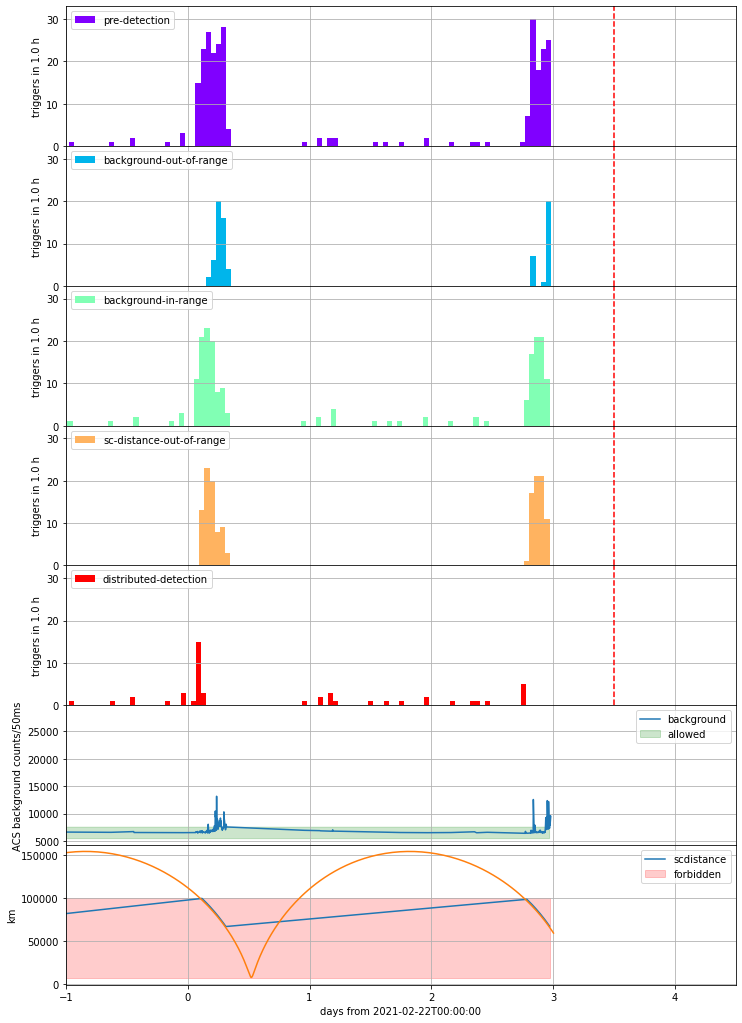

In [53]:

from matplotlib.pyplot import cm
cm.rainbow

all_kinds = sorted(set([ e['event'] for e in events ]))
colors = cm.rainbow(np.linspace(0,1,len(all_kinds)))

f, axes = plt.subplots(len(all_kinds) + 2,1, figsize=(12,18), sharex=True)

ymax = 0

for i_kind, (event_kind, ax, color) in enumerate(zip(all_kinds, axes, colors)):    
    _events = [e for e in events if e['event'] == event_kind and e['time_s'] > t1_s]
    print(event_kind, len(_events))
    
    t = np.array([e['time_s'] for e in _events])
    
    tbin_s = 3600
    
    h = ax.hist(        
        (t-t0_s)/24./3600.,
#        [i_kind for e in _events],
        label=event_kind.split()[-1],
        bins=int((t.max()-t.min())/tbin_s),
        color=color,
    )
    
    i_max = h[0].argmax()
    print(f"since {(t.max() - t.min())/24/3600:.2g} days max of {h[0][i_max]} per {tbin_s} at {h[1][i_max]:.3g}")
    tbin_s
    
    if h[0].max() > ymax:
        ymax = h[0].max()
    
    ax.set_ylim([0,400])
    
    ax.legend(loc=2)
    
    ax.grid(True)
    
    ax.set_ylabel(f"triggers in {tbin_s/3600.} h")
    
    ax.axvline((time.time() -t0_s)/24./3600., c='r', ls='--')
    
    
    #print(np.array([e['background'] for e in _events if 'background' in e]))
    

def plot_c(ax, c, **kwargs):
    t = np.array([e['time_s'] for e in events  if c in e])
    
    getv = lambda n,N=None: np.array([float(e[n]) for e in events if (N or n) in e])
    
    label = kwargs.pop('label', str(c))
    
    if isinstance(c, tuple):
        t = np.array([e['time_s'] for e in events  if c[0] in e])
                
        ax.fill_between(
            (t-t0_s)/24./3600,
            getv(c[0]),
            getv(c[1]),        
            label=label,
            alpha=0.2,
            **kwargs
        )
    else:
        ax.plot(
            (t-t0_s)/24./3600,
            getv(c),        
            label=label,
            **kwargs
        )
    ax.legend()

plot_c(axes[-2], 'background')
plot_c(axes[-2], ('backgroundl1', 'backgroundl2'), color="green", label="allowed")

axes[-2].set_ylabel("ACS background counts/50ms")
axes[-2].grid()

plot_c(axes[-1], 'scdistance')
axes[-1].plot(
    np.concatenate(
        [orbit['TIME'] for orbit in orbits]
    ) - t0_ijd, 
    np.concatenate(
        [orbit['RDIST'] for orbit in orbits]
    )
)
plot_c(axes[-1], ('scdistancel1', 'scdistancel2'), color="red", label="forbidden")
axes[-1].set_ylabel("km")
axes[-1].grid()


plt.subplots_adjust(hspace=0)

for ax in axes[:-2]:    
    ax.set_ylim([0, ymax*1.1])

plt.xlabel(f"days from {time.strftime(iisot_format, t0)}")

plt.xlim([-150, 
          (time.time() -t0_s)/24./3600. + 1])

plt.savefig("incident-long-history.png")

#plt.xlim([-20, 
#          (time.time() -t0_s)/24./3600. + 1])
#plt.savefig("incident-past-history.png")

plt.xlim([-1, 
          (time.time() -t0_s)/24./3600. + 1])

plt.savefig("incident-log.png")


In [52]:
t, r = np.concatenate(
        [orbit['TIME'] for orbit in orbits]
    ) - t0_ijd, np.concatenate(
        [orbit['RDIST'] for orbit in orbits]
    )

dt = t[1:] - t[:-1]
np.sum(dt[r[1:]>100000]) / np.sum(dt[r[1:]>0]), np.sum(dt[r[1:]>107000]) / np.sum(dt[r[1:]>0])

(0.6909171242267342, 0.649022967146007)

# Conclusion

this was the most impactful radiation belt background variation, the most triggers at least since 3 years.

this exact sort of trigger excess has regular background but was near belt edge. It could be mitigated by changing belt limit, if it continues to be problematic.


second pass showed similar behavior: RB is about 10% higher. It is difficult to veto with background, only orbit limit.